#### Importing the Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Importing the data

In [3]:
df = pd.read_csv("DataSet/economic_index.csv")

In [4]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
### Drop unneccesary columns
df.drop(columns=["Unnamed: 0", "year", "month"], axis=1, inplace= True)

In [6]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
#### check the null values in the data
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

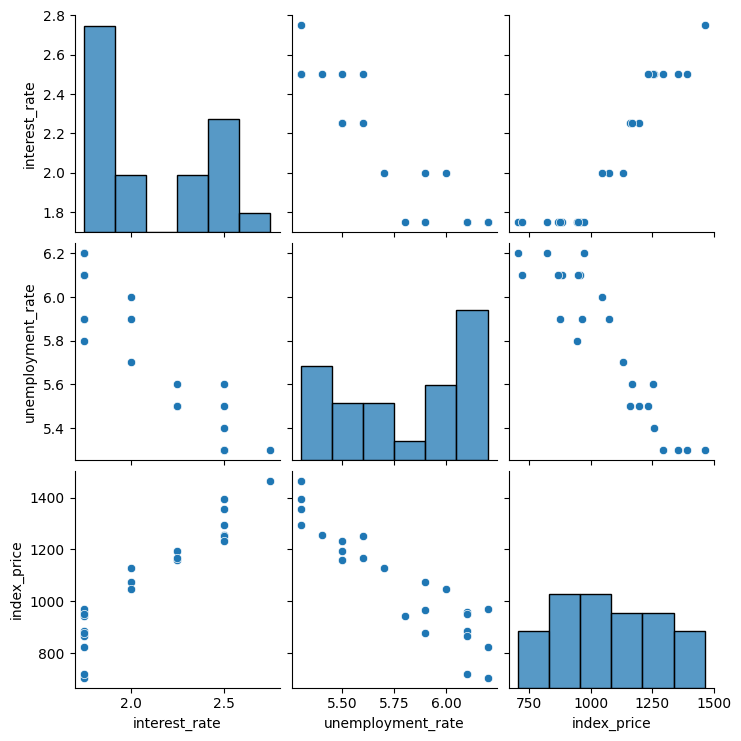

In [8]:
### Lets do some visualization
import seaborn as sns
sns.pairplot(df)

In [9]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

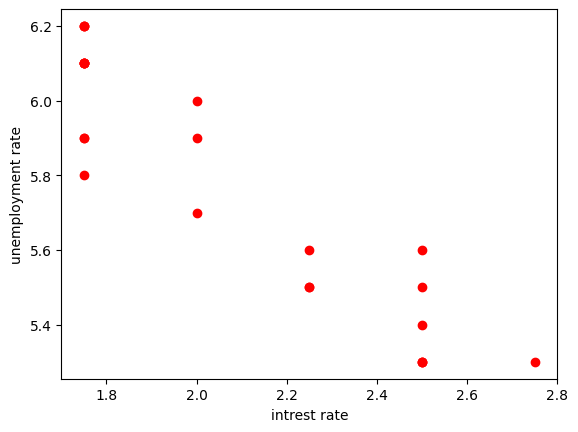

In [10]:
### Visuvalize more clearly
plt.scatter(df['interest_rate'],df['unemployment_rate'], color = 'r')
plt.xlabel("intrest rate")
plt.ylabel("unemployment rate")

In [11]:
### Indpendent and Dependent Variables
x = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [12]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [13]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

#### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

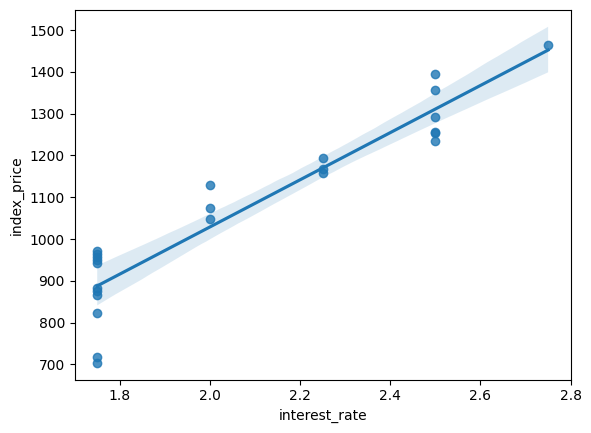

In [15]:
#### Reg Plot
import seaborn as sns
sns.regplot(x = df['interest_rate'],y= df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

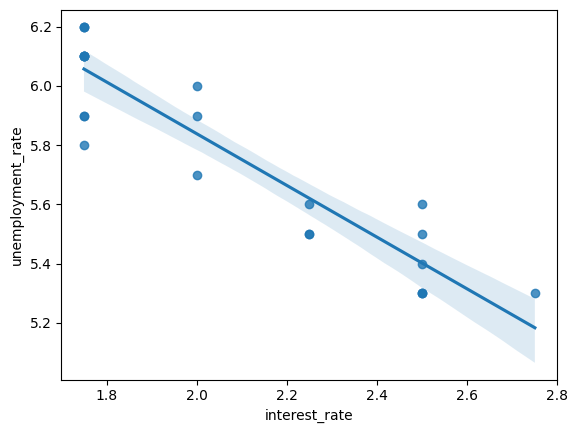

In [16]:
sns.regplot(x = df['interest_rate'],y= df['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

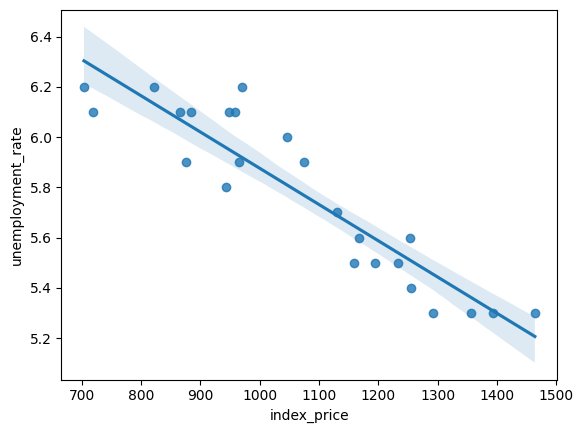

In [17]:
sns.regplot(x = df['index_price'],y= df['unemployment_rate'])

#### Standard Scaler

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### Model Creation

In [19]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [20]:
regression.fit(x_train, y_train)

LinearRegression()

#### Cross Validation

In [21]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, x_train, y_train, scoring='neg_mean_squared_error', cv = 3)

In [23]:
np.mean(validation_score)

np.float64(-5914.828180162386)

#### Prediction

In [24]:
y_pred = regression.predict(x_test)

In [25]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean absolute error: ", mae)
print("Mean squared error: ", mse)
print("Root mean squared error: ", rmse)

Mean absolute error:  59.935781523235484
Mean squared error:  5793.762887712569
Root mean squared error:  76.11677139574805


In [27]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.8278978091457145


In [28]:
#### Adjusted R^2 Value
print(1-(((1-score)*(len(y_test)-1))/(len(y_test)-x_test.shape[1]-1)))

0.7131630152428576


#### Assumptions

Text(0, 0.5, 'y_test')

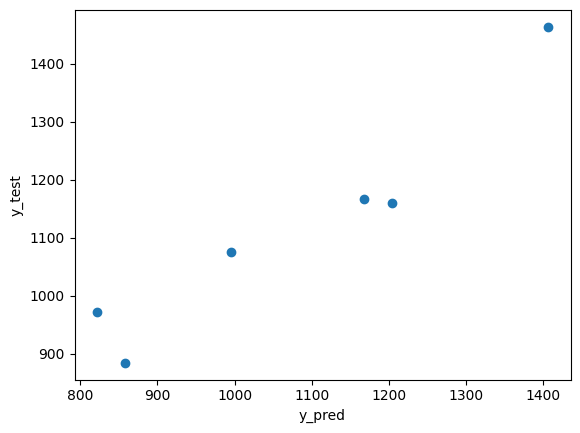

In [29]:
plt.scatter(y_pred, y_test)
plt.xlabel("y_pred")
plt.ylabel("y_test")

In [31]:
### Residulas
residuals = y_test = y_pred
print(residuals)

[1204.22770398  821.65051903 1406.51300368  857.70889608  994.90992298
 1168.16932693]


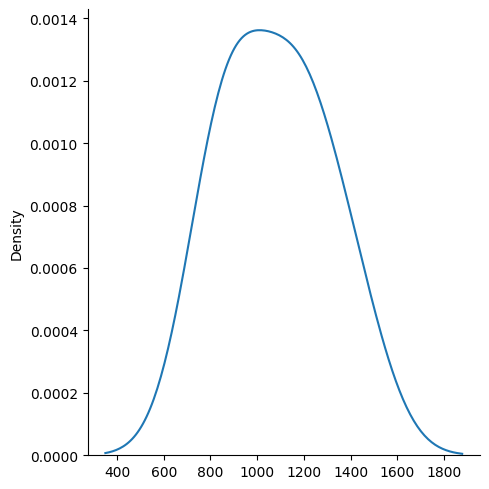

In [32]:
### Plot Residuals
sns.displot(residuals, kind='kde')

If the curve of the displot ia as above we can say that the model we get is the good model

Text(0, 0.5, 'Residuals')

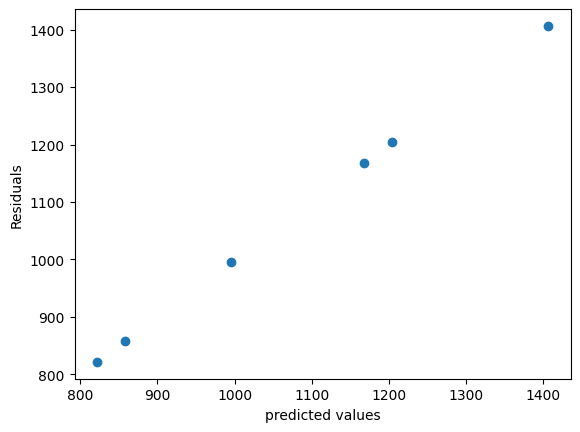

In [33]:
### Scatter Plot with the predictions and the residuals
plt.scatter(y_pred, residuals)
plt.xlabel("predicted values")
plt.ylabel("Residuals")

#### OLS MODEL

In [39]:
import statsmodels.api as sm
model = sm.OLS(y_train, x_train).fit()

In [40]:
model.summary()

d:\udemy\Data Analyst Bootcamp\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 17 Jan 2025   Prob (F-statistic):                       0.754
Time:                        19:53:15   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
regression.coef_

array([  88.27275507, -116.25716066])